In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd

data = arff.loadarff('../data/1year.arff')
df = pd.DataFrame(data[0])
df_origin = df.copy()
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [2]:
# rename columns
names = ['net profit / total assets', 'total liabilities / total assets', 'working capital / total assets', 'current assets / short-term liabilities',
         '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 'retained earnings / total assets',
         'EBIT / total assets', 'book value of equity / total liabilities', 'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets',
         'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets', '(total liabilities * 365) / (gross profit + depreciation)',
         '(gross profit + depreciation) / total liabilities', 'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales',
         'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales', 'gross profit (in 3 years) / total assets', '(equity - share capital) / total assets',
         '(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses', 'working capital / fixed assets', 'logarithm of total assets',
         '(total liabilities - cash) / sales', '(gross profit + interest) / sales', '(current liabilities * 365) / cost of products sold','operating expenses / short-term liabilities',
         'operating expenses / total liabilities', 'profit on sales / total assets', 'total sales / total assets', '(current assets - inventories) / long-term liabilities',
         'constant capital / total assets', 'profit on sales / sales', '(current assets - inventory - receivables) / short-term liabilities',
         'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 'profit on operating activities / sales', 'rotation receivables + inventory turnover in days',
         '(receivables * 365) / sales', 'net profit / inventory', '(current assets - inventory) / short-term liabilities', '(inventory * 365) / cost of products sold',
         'EBITDA (profit on operating activities - depreciation) / total assets', 'EBITDA (profit on operating activities - depreciation) / sales', 'current assets / total liabilities',
         'short-term liabilities / total assets', '(short-term liabilities * 365) / cost of products sold)', 'equity / fixed assets', 'constant capital / fixed assets', 'working capital',
         '(sales - cost of products sold) / sales', '(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 'total costs /total sales',
         'long-term liabilities / equity', 'sales / inventory', 'sales / receivables', '(short-term liabilities *365) / sales', 'sales / short-term liabilities', 'sales / fixed assets',]

y = df['class']
df = df.iloc[:,0:64]
df.columns = names

In [3]:
df.head()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df)
x_scaled_origin = scaler.fit_transform(df_origin)
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

X_scaled_df.head()

X_scaled_df_origin = pd.DataFrame(x_scaled_origin, columns=df_origin.columns)


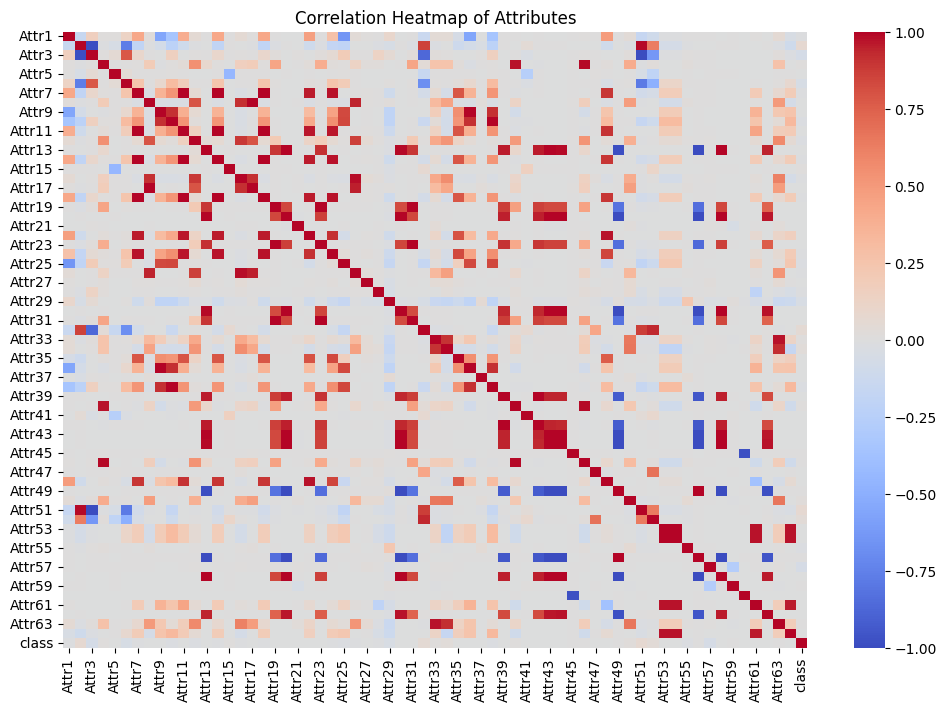

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

def custom_annote(val):
    if val > 0.7 or val < -0.7:
        return val
    else:
        return ''
    
sns.heatmap(X_scaled_df_origin.corr(), annot= False
            , cmap='coolwarm')

plt.title('Correlation Heatmap of Attributes')
plt.show()


<Axes: >

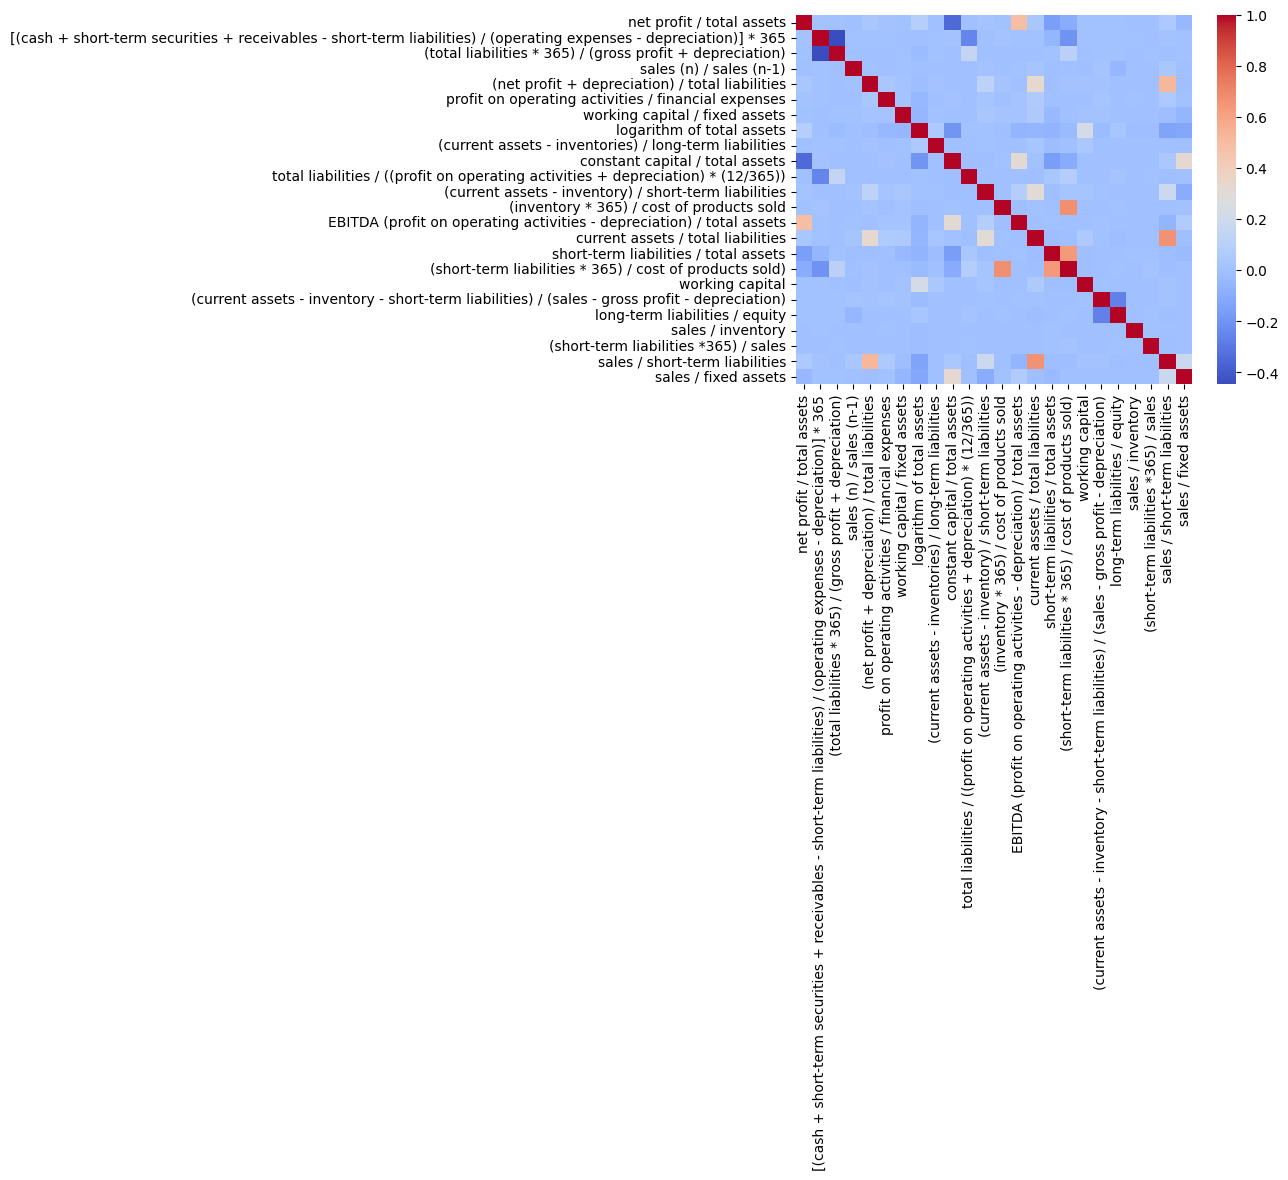

In [21]:
# Set the correlation threshold
threshold = 0.7

# Calculate the correlation matrix
correlation_matrix = X_scaled_df.corr()

attr_list=[]
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            if correlation_matrix.columns[j] not in attr_list:
                attr_list.append(correlation_matrix.columns[j])

X_scaled_df_origin_low_cor = X_scaled_df.drop(columns=attr_list)

sns.heatmap(X_scaled_df_origin_low_cor.corr(), annot= False
            , cmap='coolwarm')


In [26]:
# find pairs with high correlation
high_cor = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            if correlation_matrix.columns[j] != correlation_matrix.columns[i]:
                high_cor.append([correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]])

print(high_cor[:5])
len(high_cor)

[['working capital / total assets', 'total liabilities / total assets', -0.9857816981641183], ['retained earnings / total assets', 'total liabilities / total assets', -0.7722273928744237], ['retained earnings / total assets', 'working capital / total assets', 0.7811936550545634], ['equity / total assets', 'sales / total assets', 0.9121493716705286], ['(gross profit + extraordinary items + financial expenses) / total assets', 'EBIT / total assets', 0.9943885019296682]]


162